In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from keras.datasets import fashion_mnist
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.regularizers import L2
from keras.optimizers import Adam
import tensorflow as tf 
from sklearn.metrics import classification_report
from keras.utils import to_categorical 


In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
train_res = {}

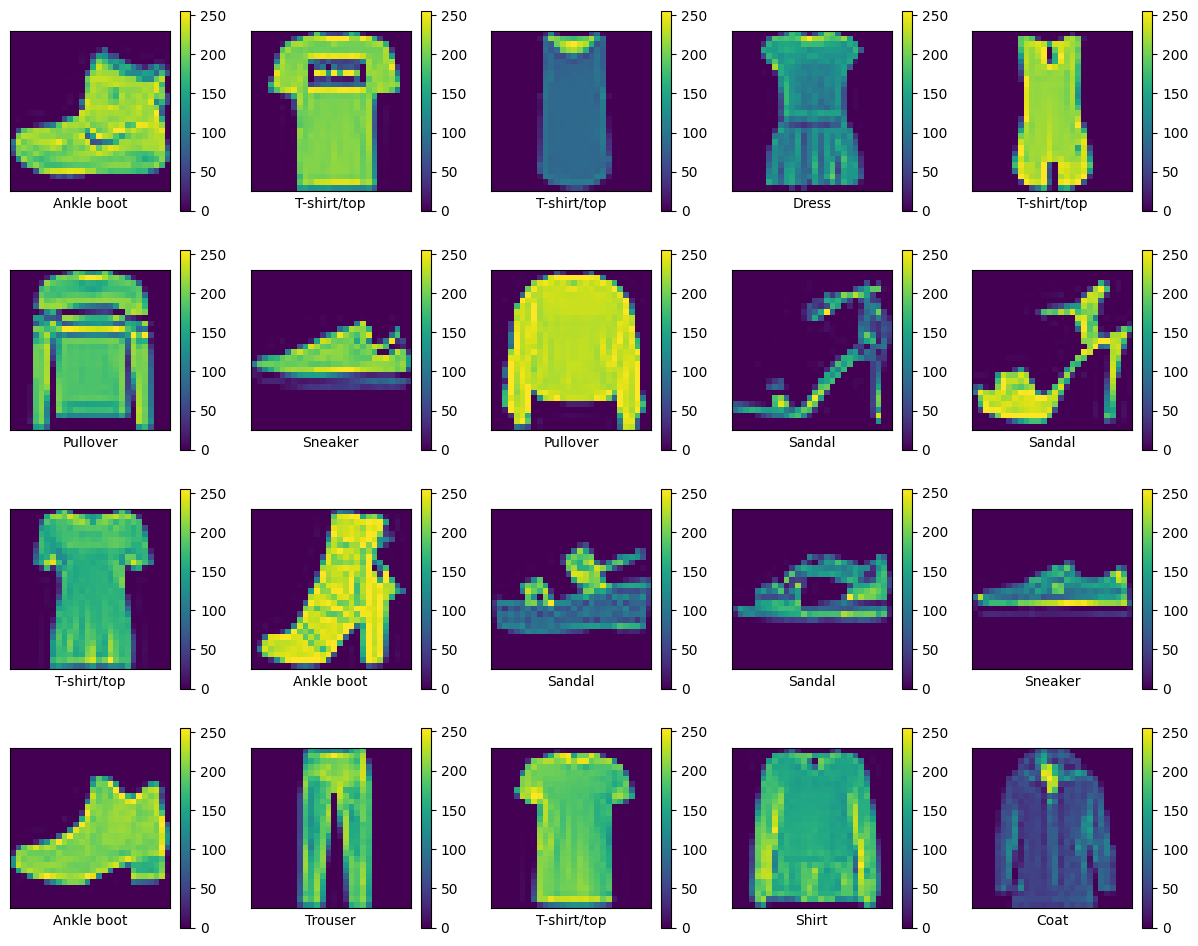

In [6]:
# Sample image
plt.figure(figsize=(15,15))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.colorbar()
    plt.xlabel(labels[train_labels[i]])
plt.show()


In [7]:
# train,val,test
# reshape
# normalize

train_images,train_labels = train_images[10000:],train_labels[10000:]
val_images,val_labels =  train_images[:10000],train_labels[:10000]
print(train_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(val_labels.shape)

train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
val_images = val_images.reshape(val_images.shape[0],val_images.shape[1],val_images.shape[2],1)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)

print(train_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(val_labels.shape)

train_images = train_images/255.0
val_images  = val_images/255.0
test_images = test_images/255.0

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)
(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000,)
(10000,)


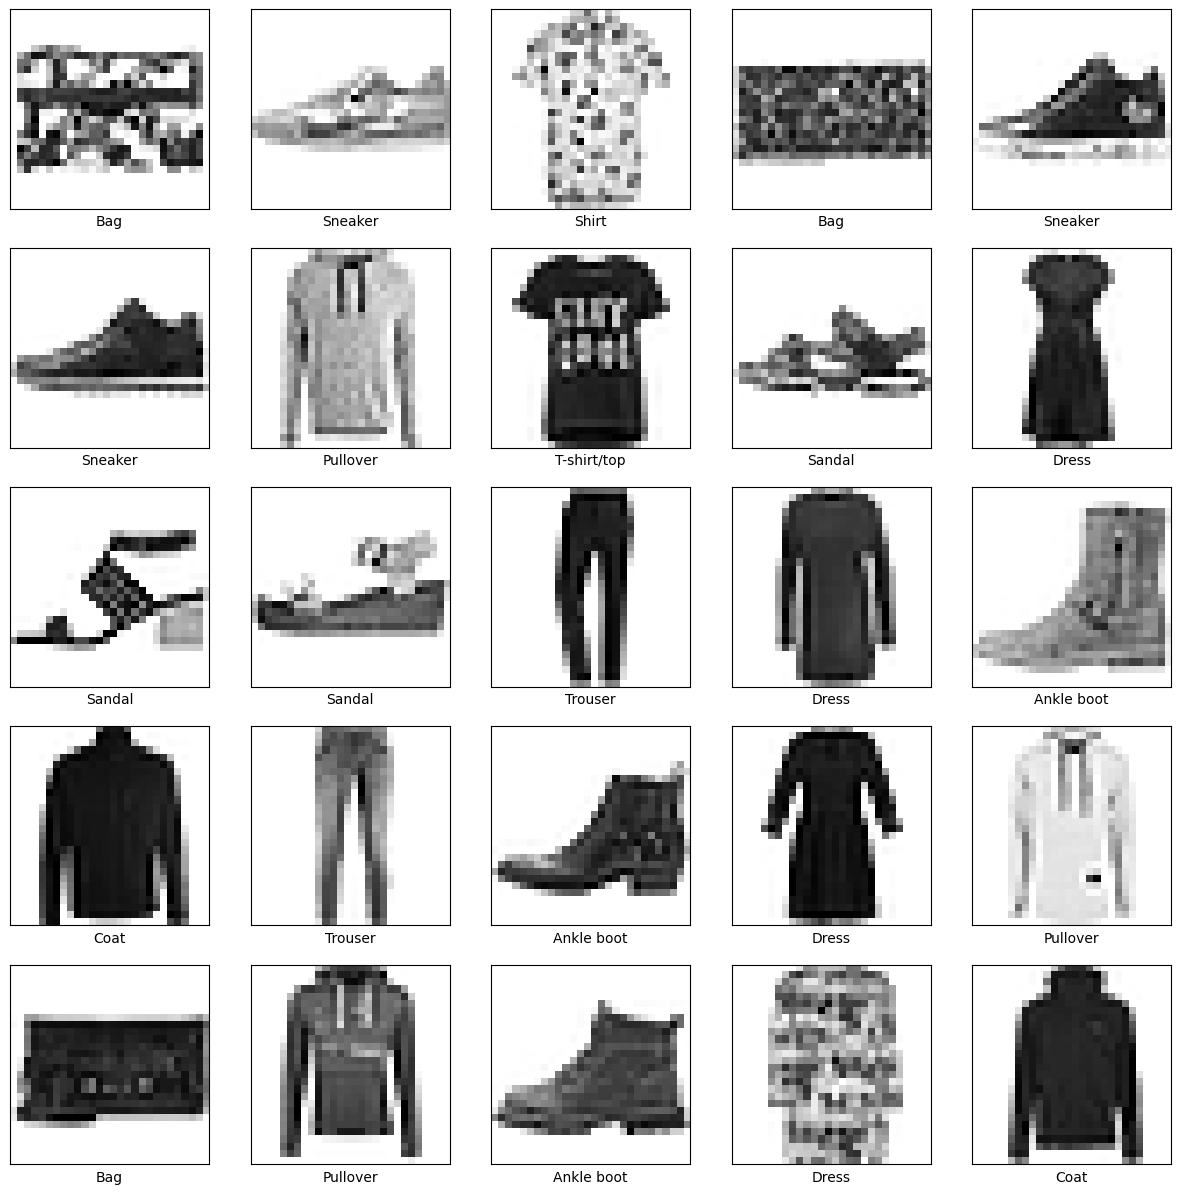

In [8]:
# standartized input images 

plt.figure(figsize=(15,15))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap= plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(labels[train_labels[i]])
plt.show()

In [9]:
from keras.callbacks import TensorBoard,EarlyStopping
logdir = 'logs/'
tensorboard_callback = TensorBoard(log_dir=logdir)
early_callback = EarlyStopping(monitor='val_loss',patience=15)

In [10]:
#model1 : 1conv bn pooling
model1 = Sequential(name='Model1')
model1.add(Conv2D(64,kernel_size=3,activation='relu',input_shape = (28,28,1),))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10,activation='softmax'))

model1.summary()



Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256

In [11]:
# model2 : 3conv pooling bn
model2 = Sequential(name='Model2')
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape = (train_images.shape[1:])))
model2.add(BatchNormalization())
model2.add(Conv2D(64,kernel_size=3,activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Conv2D(128,kernel_size=3,activation='relu'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))

model2.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0    

In [12]:
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
# training
train_res['Model1'] = model1.fit(train_images,train_labels,validation_data=(val_images,val_labels),batch_size=64,epochs=10,verbose=2)

train_res['Model2'] = model2.fit(train_images,train_labels,validation_data=(val_images,val_labels),batch_size=64,epochs=10,verbose=2)

Epoch 1/10


782/782 - 25s - loss: 0.3616 - accuracy: 0.8717 - val_loss: 0.2994 - val_accuracy: 0.8880 - 25s/epoch - 32ms/step
Epoch 2/10
782/782 - 22s - loss: 0.2402 - accuracy: 0.9132 - val_loss: 0.1983 - val_accuracy: 0.9297 - 22s/epoch - 28ms/step
Epoch 3/10
782/782 - 21s - loss: 0.1956 - accuracy: 0.9279 - val_loss: 0.1530 - val_accuracy: 0.9453 - 21s/epoch - 27ms/step
Epoch 4/10
782/782 - 22s - loss: 0.1636 - accuracy: 0.9411 - val_loss: 0.1246 - val_accuracy: 0.9561 - 22s/epoch - 28ms/step
Epoch 5/10
782/782 - 21s - loss: 0.1375 - accuracy: 0.9496 - val_loss: 0.1063 - val_accuracy: 0.9634 - 21s/epoch - 27ms/step
Epoch 6/10
782/782 - 21s - loss: 0.1180 - accuracy: 0.9569 - val_loss: 0.1186 - val_accuracy: 0.9552 - 21s/epoch - 27ms/step
Epoch 7/10
782/782 - 21s - loss: 0.0995 - accuracy: 0.9634 - val_loss: 0.0875 - val_accuracy: 0.9689 - 21s/epoch - 27ms/step
Epoch 8/10
782/782 - 22s - loss: 0.0828 - accuracy: 0.9708 - val_loss: 0.0670 - val_accuracy: 0.9762 - 22s/epoch - 28ms/ste

ValueError: in user code:

    File "C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 505, in enter_context
        result = _enter(cm)
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py", line 138, in __enter__
        except StopIteration:

    ValueError: 'Model 2/' is not a valid root scope name. A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$


In [44]:
train_res['Model2'] = model2.fit(train_images,train_labels,validation_data=(val_images,val_labels),batch_size=64,epochs=10,verbose=2)

Epoch 1/10
782/782 - 118s - loss: 0.3757 - accuracy: 0.8660 - val_loss: 0.3030 - val_accuracy: 0.8955 - 118s/epoch - 151ms/step
Epoch 2/10
782/782 - 140s - loss: 0.2533 - accuracy: 0.9080 - val_loss: 0.3502 - val_accuracy: 0.8812 - 140s/epoch - 179ms/step
Epoch 3/10
782/782 - 131s - loss: 0.2104 - accuracy: 0.9246 - val_loss: 0.1734 - val_accuracy: 0.9385 - 131s/epoch - 167ms/step
Epoch 4/10
782/782 - 131s - loss: 0.1797 - accuracy: 0.9361 - val_loss: 0.2241 - val_accuracy: 0.9128 - 131s/epoch - 168ms/step
Epoch 5/10
782/782 - 138s - loss: 0.1532 - accuracy: 0.9444 - val_loss: 0.1686 - val_accuracy: 0.9335 - 138s/epoch - 176ms/step
Epoch 6/10
782/782 - 143s - loss: 0.1275 - accuracy: 0.9541 - val_loss: 0.1158 - val_accuracy: 0.9569 - 143s/epoch - 183ms/step
Epoch 7/10
782/782 - 138s - loss: 0.1110 - accuracy: 0.9597 - val_loss: 0.1295 - val_accuracy: 0.9509 - 138s/epoch - 177ms/step
Epoch 8/10
782/782 - 139s - loss: 0.0901 - accuracy: 0.9667 - val_loss: 0.1576 - val_accuracy: 0.9379 - 

In [45]:
test_loss_1,test_acc_1 = model1.evaluate(test_images,test_labels,verbose=2)
train_loss_1,train_acc_1 = model1.evaluate(train_images,train_labels,verbose=2)
val_loss_1,val_acc_1 = model1.evaluate(val_images,val_labels,verbose=2)

test_loss_2,test_acc_2 = model2.evaluate(test_images,test_labels,verbose=2)
train_loss_2,train_acc_2 = model2.evaluate(train_images,train_labels,verbose=2)
val_loss_2,val_acc_2 = model2.evaluate(val_images,val_labels,verbose=2)





313/313 - 2s - loss: 0.3284 - accuracy: 0.9147 - 2s/epoch - 7ms/step
1563/1563 - 8s - loss: 0.0384 - accuracy: 0.9877 - 8s/epoch - 5ms/step
313/313 - 2s - loss: 0.0396 - accuracy: 0.9870 - 2s/epoch - 5ms/step
313/313 - 6s - loss: 0.3490 - accuracy: 0.9030 - 6s/epoch - 20ms/step
1563/1563 - 31s - loss: 0.0791 - accuracy: 0.9706 - 31s/epoch - 20ms/step
313/313 - 6s - loss: 0.0748 - accuracy: 0.9726 - 6s/epoch - 20ms/step


In [46]:
from IPython.display import display

df = pd.DataFrame([[train_loss_1*100,val_loss_1*100,test_loss_1*100,train_acc_1,val_acc_1,test_acc_1],
                   [train_loss_2*100,val_loss_2*100,test_loss_2*100,train_acc_2,val_acc_2,test_acc_2]],
                   ['1Conv+ 1FC +pooling','3Conv+1Fc+pooling'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

display(df)

,Train Loss,Validation Loss,Test Loss,Train Acc,Validation Acc,Test Acc
1Conv+ 1FC +pooling,3.844677,3.962019,32.843962,0.98768,0.9870,0.9147
3Conv+1Fc+pooling,7.905584,7.478638,34.899160,0.97056,0.9726,0.9030


In [47]:
# 3Conv + pooling + FC +BN _ dropout
model3 = Sequential([Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)),
                     BatchNormalization(),

                     Conv2D(64,kernel_size=3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Dropout(0,3),
                     
                     Conv2D(128,kernel_size=3,activation='relu'),
                     BatchNormalization(),
                     Dropout(0.5),
                     
                     Flatten(),
                     Dense(128,activation='relu'),
                     BatchNormalization(),
                     Dropout(0.5),
                     Dense(10,activation='softmax')],name='Model3')

model3.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_18 (Ba  (None, 26, 26, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 128)       73856

In [49]:
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [50]:
model3.fit(train_images,train_labels,validation_data=(val_images,val_labels),epochs=10,batch_size=64,verbose=1,shuffle=True)

Epoch 1/10
782/782 [==============================] - 131s 164ms/step - loss: 0.4817 - accuracy: 0.8292 - val_loss: 0.2935 - val_accuracy: 0.8903
Epoch 2/10
782/782 [==============================] - 140s 179ms/step - loss: 0.3089 - accuracy: 0.8907 - val_loss: 0.2846 - val_accuracy: 0.8932
Epoch 3/10
782/782 [==============================] - 138s 177ms/step - loss: 0.2702 - accuracy: 0.9025 - val_loss: 0.2139 - val_accuracy: 0.9198
Epoch 4/10
782/782 [==============================] - 139s 178ms/step - loss: 0.2447 - accuracy: 0.9134 - val_loss: 0.1836 - val_accuracy: 0.9321
Epoch 5/10
782/782 [==============================] - 150s 192ms/step - loss: 0.2191 - accuracy: 0.9225 - val_loss: 0.1611 - val_accuracy: 0.9413
Epoch 6/10
782/782 [==============================] - 144s 184ms/step - loss: 0.2054 - accuracy: 0.9251 - val_loss: 0.1463 - val_accuracy: 0.9450
Epoch 7/10
782/782 [==============================] - 160s 204ms/step - loss: 0.1891 - accuracy: 0.9318 - val_loss: 0.1213 -

In [1]:
test_loss_3,test_acc_3  = model3.evaluate(test_images,test_labels,verbose=1)
train_loss_3,train_acc_3 = model3.evaluate(train_images,train_labels,verbose=1)
val_loss_3,val_acc_3 = model3.evaluate(val_images,val_labels,verbose=1)

NameError: name 'model3' is not defined

In [ ]:
df = pd.DataFrame([[train_loss_3*100,val_loss_3*100,test_loss_3*100,train_acc_3,val_acc_3,test_acc_3],],
                   ['3Conv+1Fc+pooling+dropout'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

In [13]:
model4 = Sequential([Conv2D(64,kernel_size=3,activation='relu',kernel_regularizer=Regularizer,input_shape=(28,28,1)),
                     BatchNormalization(),
                     
                     Conv2D(64,kernel_size=3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     
                     Conv2D(128,kernel_size=3,activation='relu'),
                     BatchNormalization(),
                     
                     Flatten(),
                     Dense(128,activation='relu'),
                     BatchNormalization(),
                     Dense(10,activation='softmax')],name = 'Model4')

NameError: name 'Regularizer' is not defined

In [ ]:
model4.compile(loss = 'sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model4.fit(train_images,train_labels,validation_data=(val_images,val_labels),epochs=10,batch_size=64,verbose=1,shuffle=True)

In [ ]:
test_loss_4,test_acc_4  = model3.evaluate(test_images,test_labels,verbose=1)
train_loss_4,train_acc_4 = model3.evaluate(train_images,train_labels,verbose=1)
val_loss_4,val_acc_4 = model3.evaluate(val_images,val_labels,verbose=1)

In [ ]:
df = pd.DataFrame([[train_loss_4*100,val_loss_4*100,test_loss_4*100,train_acc_4,val_acc_4,test_acc_4],],
                   ['3Conv+1Fc+pooling+L2'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

In [14]:
predictions = model3.predict(test_images)
test_labels_vec = to_categorical(test_labels,10)


NameError: name 'model3' is not defined

In [ ]:
print(classification_report(test_labels_vec.argmax(axis=1),predictions.argmax(axis = 1),target_names=lables))

In [ ]:
# incorect preiction and real labels 
corrects = np.nonzero(np.argmax(predictions,axis=1) == test_labels) [0]
incorrects = np.nonzero(np.argmax(predictions,axis=1) != test_labels) [0]

plt.figure(figsize=(20,20))
for i ,incorrect in enumerate(incorrects[0:20]):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28))
    plt.title('Predict:{},Class: {}'.format(labels[predictions.argmax(axis = 1)[incorrect]],labels[test_labels_vec.argmax(axis=-1)[incorrect]]))
    plt.tight_layout()
    

In [ ]:
# visualize 

%matplotlib inline

def helper_plt(col,val,traning_val,valid_val):
    xy[col].plot(epochs,traning_val,color = 'orange',label = 'Traning %s' % val)
    xy[col].plot(epochs,valid_val,color = 'mgenta',label = 'Validation %s' % val)
    xy[col].title